
## Recurrent Neural Network for Sequential Data Prediction

In this notebook, I am building a Recurrent Neural Network (RNN) to predict sequential data. Specifically, I will be predicting a sine wave. This involves generating a sine wave dataset, preparing the data for the RNN, building and training the model, and finally evaluating its performance.


In [12]:
#importing
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [49]:
##generating the data
X = []
y = []
for i in range(1000):
    x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, 50 + 1)
    sine_wave = np.sin(x)
    X.append(sine_wave[:-1])
    y.append(sine_wave[1:])

X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)
print(X.shape,y.shape)
print(X)

torch.Size([1000, 50]) torch.Size([1000, 50])
tensor([[ 0.0000e+00,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01],
        [-2.4493e-16,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01],
        [-4.8986e-16,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01],
        ...,
        [ 1.0397e-13,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01],
        [-1.4496e-13,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01],
        [-3.9390e-13,  1.2533e-01,  2.4869e-01,  ..., -3.6812e-01,
         -2.4869e-01, -1.2533e-01]])


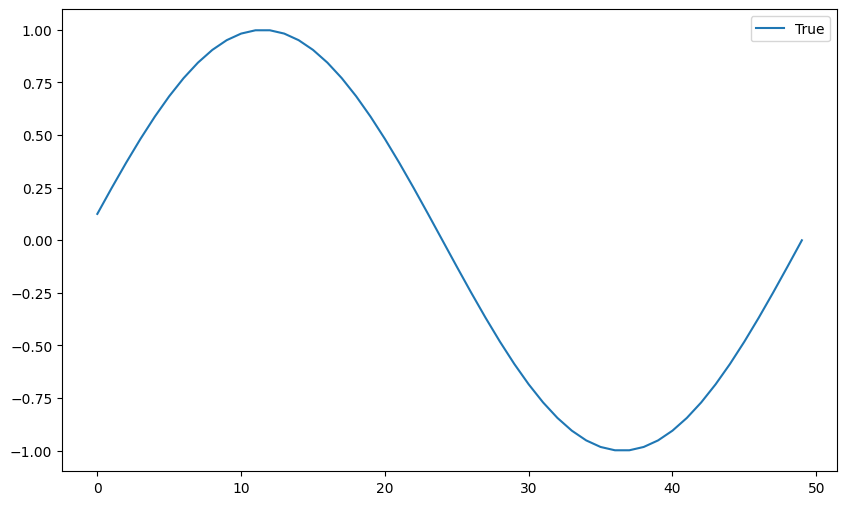

1000

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.legend()
plt.show()
X.size(0)

In [83]:
class PredictionRNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(PredictionRNN, self).__init__()
        self.rnn = nn.RNN(input_size,hidden_size,nonlinearity='tanh',batch_first=True)
        self.fc = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        h0 = torch.zeros(1, x.size(0),hidden_size)
        out,h_t = self.rnn(x,h0)
        out = self.fc(out)
        return out

input_size = 1
output_size = 1
hidden_size = 20

model = PredictionRNN(input_size,hidden_size,output_size)
model
list(model.parameters())


[Parameter containing:
 tensor([[ 0.2088],
         [ 0.0251],
         [-0.1964],
         [ 0.1894],
         [-0.1316],
         [-0.0427],
         [ 0.0913],
         [ 0.0357],
         [ 0.0359],
         [-0.1443],
         [-0.0339],
         [-0.1409],
         [-0.2072],
         [ 0.1434],
         [-0.1843],
         [-0.2200],
         [-0.1544],
         [-0.1531],
         [ 0.0901],
         [-0.2028]], requires_grad=True),
 Parameter containing:
 tensor([[-1.8079e-02, -2.0956e-01,  1.4365e-01, -1.1587e-01, -4.8165e-02,
          -1.6541e-03, -1.8562e-01,  2.0865e-01,  7.7714e-02,  9.3714e-02,
          -1.9734e-01,  2.3716e-02,  8.4715e-03,  7.7041e-02,  1.2924e-01,
           9.7476e-02,  8.2225e-02,  6.9726e-03,  1.6999e-01,  1.4916e-01],
         [ 8.5466e-02, -6.3750e-02,  5.8859e-02,  7.7130e-02, -1.6691e-01,
          -1.6374e-01,  1.3361e-01, -3.6956e-03, -7.0661e-02,  1.0524e-01,
           1.1869e-01,  1.2538e-01,  1.3689e-01, -8.6316e-03,  1.2147e-02,
      

In [102]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

In [104]:
epochs = 100
losses = []
for epoch in range(epochs):

    model.train()

    # Check if X is None
    if X is None:
        raise ValueError("X is None")

    # Check if y is None
    if y is None:
        raise ValueError("y is None")

    output = model(X.unsqueeze(2))

    loss = loss_fn(output, y.unsqueeze(2))

    losses.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f"epoch:{epoch}|loss:{loss.item()}")




epoch:0|loss:1.8535971321398392e-05
epoch:1|loss:0.000351370545104146
epoch:2|loss:4.9140948249259964e-05
epoch:3|loss:8.857536158757284e-05
epoch:4|loss:0.00020508270245045424
epoch:5|loss:0.00015592249110341072
epoch:6|loss:5.427378710010089e-05
epoch:7|loss:2.027574009844102e-05
epoch:8|loss:5.885449718334712e-05
epoch:9|loss:0.0001040263450704515
epoch:10|loss:0.00010295707761542872
epoch:11|loss:6.088388545322232e-05
epoch:12|loss:2.329731432837434e-05
epoch:13|loss:2.144745667465031e-05
epoch:14|loss:4.519966023508459e-05
epoch:15|loss:6.451141962315887e-05
epoch:16|loss:5.9748224884970114e-05
epoch:17|loss:3.6566514609148726e-05
epoch:18|loss:1.8348571757087484e-05
epoch:19|loss:1.9666043954202905e-05
epoch:20|loss:3.3063806768041104e-05
epoch:21|loss:4.242529394105077e-05
epoch:22|loss:3.8721944292774424e-05
epoch:23|loss:2.5770554202608764e-05
epoch:24|loss:1.63654622156173e-05
epoch:25|loss:1.815422911022324e-05
epoch:26|loss:2.5947547328541987e-05
epoch:27|loss:3.02219541481

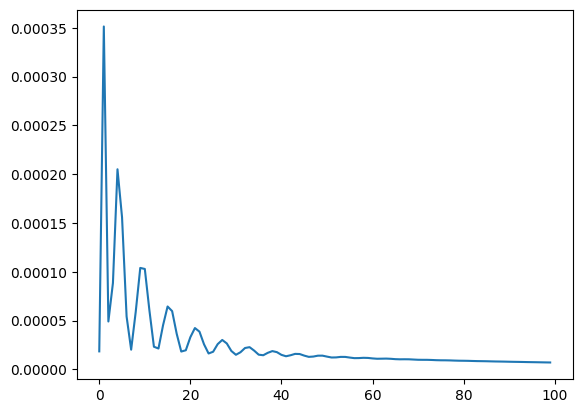

In [105]:
plt.plot(losses)

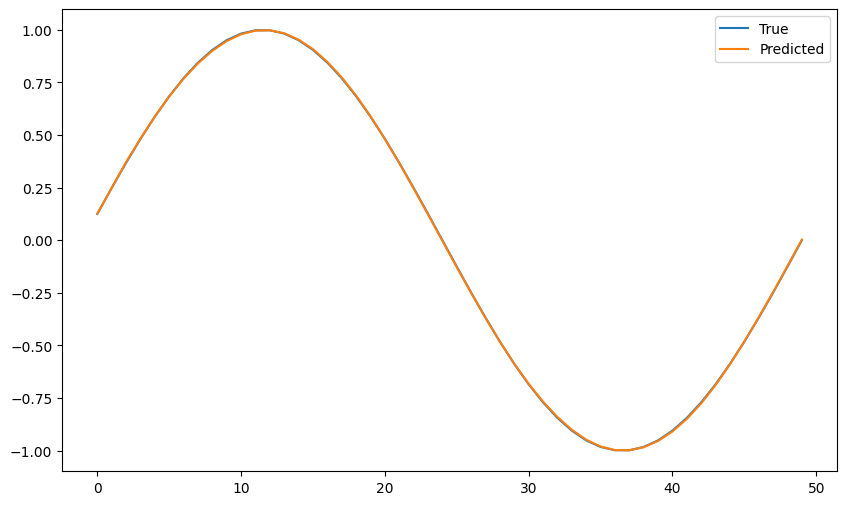

In [107]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()

#### we got almost perfect output